In [4]:
from IPython.core.display import display, HTML
display(HTML('<h1>Hello, world!</h1>'))

In [2]:
from ipywidgets import interact
 
def my_function(x):
    return x
 
# create a slider
i = interact(my_function, x=20)


interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

# Overview Longtail Financial

Bitcoin is the greatest performing Asset in Human History

In [150]:
from datetime import datetime

yahoo_collection = store.collection('yahoo_demo')

def retrieve(ticker):
    return yahoo_collection.item(ticker).to_pandas()

def retrieve_all(sector):
    return {ticker: retrieve(ticker) for ticker in sector}

def format_date(sector):
    """Transforms timestamp column into pd.datetime column."""
    for ticker, df in sector.items():
        if not df['date'].dtype == 'datetime64[ns]':
            df['date'] = pd.to_datetime(df['date'].apply(datetime.fromtimestamp))
            
def norm(sector):
    """Adds a normalized price column to all series in sector."""
    for ticker, df in sector.items():
        df['normprice'] = df['close'] / df['close'].iloc[0]
        
def compare(sector):
    """Returns a new dataframe with all normalized prices"""
    date_index = list(sector.values())[0]['date']
    return pd.DataFrame(data={ticker: df['normprice'] for ticker, df in sector.items()}).set_index(date_index)

def format_and_compare(sector):
    format_date(sector)
    norm(sector)
    comp = compare(sector)
    return comp

tech_stocks = retrieve_all(['AAPL', 'MSFT', 'INTC'])
bank_stocks = retrieve_all(['WFC', 'BAC', 'C'])
commodity_futures = retrieve_all(['GC=F', 'SI=F', 'CL=F'])
cryptocurrencies = retrieve_all(['BTC-USD', 'ETH-USD', 'XRP-USD'])
currencies = retrieve_all(['EURUSD=X', 'JPY=X', 'GBPUSD=X'])
mutual_funds = retrieve_all(['PRLAX', 'QASGX', 'HISFX'])
us_treasuries = retrieve_all(['TNX', 'IRX', 'TYX'])

In [177]:
tech_comparison = format_and_compare(tech_stocks)
bank_comparison = format_and_compare(bank_stocks)
com_comparison = format_and_compare(commodity_futures)
crypt_comparison = format_and_compare(cryptocurrencies)
curr_comparison = format_and_compare(currencies)
mut_comparison = format_and_compare(mutual_funds)
us_comparison = format_and_compare(us_treasuries)

In [182]:
crypt_comparison

,BTC-USD,ETH-USD,XRP-USD
date,,,
2010-07-16 16:00:00,1.000000,1.00,1.000000
2010-07-17 16:00:00,1.733791,0.40,1.051871
2010-07-18 16:00:00,1.631994,0.40,1.050558
2010-07-19 16:00:00,1.509594,0.40,1.141825
2010-07-20 16:00:00,1.599879,0.33,1.116218
...,...,...,...
2019-09-10 16:00:00,205312.262005,NaN,NaN
2019-09-11 16:00:00,210643.512334,NaN,NaN
2019-09-12 16:00:00,209498.896626,NaN,NaN


In [181]:
mut_comparison.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [176]:
bank_comparison.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [169]:

format_date(tech_stocks)
norm(tech_stocks)
comp = compare(tech_stocks)
comp.hvplot.line(title="Tech Stocks")

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [149]:
compare(tech_stocks)

,AAPL,MSFT,INTC
date,,,
2009-09-15 06:30:00,1.000000,1.000000,1.000000
2009-09-16 06:30:00,1.038308,1.000000,1.005115
2009-09-17 06:30:00,1.053608,1.003968,0.992839
2009-09-18 06:30:00,1.056291,1.002381,1.000512
2009-09-21 06:30:00,1.050582,1.003968,0.999489
...,...,...,...
2019-09-09 06:30:00,8.558974,5.457143,2.638875
2019-09-10 06:30:00,8.660082,5.400000,2.650639
2019-09-11 06:30:00,8.935430,5.401587,2.700256


In [108]:
def format(se)
tech_stocks['AAPL']['date'] = pd.to_datetime(tech_stocks['AAPL']['date'].apply(datetime.fromtimestamp))
tech_stocks['AAPL']['normprice'] = tech_stocks['AAPL']['close'] / tech_stocks['AAPL']['close'].iloc[0]

In [102]:
import hvplot.pandas

In [110]:
tech_stocks['AAPL'].hvplot.line(x='date',y='normprice')

:Curve   [date]   (normprice)

In [90]:
datetime.fromtimestamp(tech_stocks['AAPL']['date'].iloc[0])

datetime.datetime(2009, 9, 15, 6, 30)

In [88]:
pd.to_datetime(tech_stocks['AAPL'].apply(datetime.fromtimestamp))

TypeError: ("cannot convert the series to <class 'int'>", 'occurred at index date')

In [89]:
pd.to_datetime(tech_stocks['AAPL'])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [20]:
from yahoofinancials import YahooFinancials

tech_stocks = ['AAPL', 'MSFT', 'INTC']
bank_stocks = ['WFC', 'BAC', 'C']
commodity_futures = ['GC=F', 'SI=F', 'CL=F']
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'XRP-USD']
currencies = ['EURUSD=X', 'JPY=X', 'GBPUSD=X']
mutual_funds = ['PRLAX', 'QASGX', 'HISFX']
us_treasuries = ['^TNX', '^IRX', '^TYX']

yahoo_financials_tech = YahooFinancials(tech_stocks)
yahoo_financials_banks = YahooFinancials(bank_stocks)
yahoo_financials_commodities = YahooFinancials(commodity_futures)
yahoo_financials_cryptocurrencies = YahooFinancials(cryptocurrencies)
yahoo_financials_currencies = YahooFinancials(currencies)
yahoo_financials_mutualfunds = YahooFinancials(mutual_funds)
yahoo_financials_treasuries = YahooFinancials(us_treasuries)

#tech_cash_flow_data_an = yahoo_financials_tech.get_financial_stmts('annual', 'cash')
#bank_cash_flow_data_an = yahoo_financials_banks.get_financial_stmts('annual', 'cash')

#banks_net_ebit = yahoo_financials_banks.get_ebit()
daily_tech_stocks = yahoo_financials_tech.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_bank_stock_prices = yahoo_financials_banks.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_commodity_prices = yahoo_financials_commodities.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_crypto_prices = yahoo_financials_cryptocurrencies.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_currency_prices = yahoo_financials_currencies.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_mutualfund_prices = yahoo_financials_mutualfunds.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
daily_treasury_prices = yahoo_financials_treasuries.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')

SyntaxError: invalid syntax (<ipython-input-20-6dedf320f24a>, line 23)

In [81]:
'^TNX'.replace('^','')

'TNX'

In [73]:
TNX = pd.DataFrame(daily_treasury_prices['^TNX']['prices'])
IRX = pd.DataFrame(daily_treasury_prices['^IRX']['prices'])
TYX = pd.DataFrame(daily_treasury_prices['^TYX']['prices'])

In [84]:
yahoo_collection.write('TYX',TYX ,metadata={'sector':'treasury','source': 'yahoo','freq':'daily'},overwrite=True)

In [ ]:
ahoo_collection.write(key, pd.DataFrame(value['prices']),metadata={'sector':'treasury','source': 'yahoo','freq':'daily'},overwrite=True)

In [79]:
yahoo_collection.item('TNX')

PyStore.item <yahoo_demo/TNX>

In [61]:
for key, value in daily_treasury_prices.items():
    yahoo_collection.write(key, pd.DataFrame(value['prices']),metadata={'sector':'treasury','source': 'yahoo','freq':'daily'},overwrite=True)

In [48]:
def retrieve(ticker):
    return yahoo_collection.item(ticker).to_pandas()

In [50]:
tech = {ticker: retrieve(ticker) for ticker in tech_stocks}

In [47]:
yahoo_collection.item('AAPL').to_pandas()

,date,high,low,open,close,volume,adjclose,formatted_date
,,,,,,,,
0,1253021400,25.092857,24.798571,24.862858,25.022858,106617700,21.837778,2009-09-15
1,1253107800,26.107143,25.411428,25.427143,25.981428,188505800,22.674335,2009-09-16
2,1253194200,26.684286,25.995714,25.997143,26.364286,202643000,23.008459,2009-09-17
3,1253280600,26.650000,26.394285,26.547142,26.431429,150395700,23.067062,2009-09-18
4,1253539800,26.451429,25.945715,26.327143,26.288572,109428900,22.942383,2009-09-21
...,...,...,...,...,...,...,...,...
2512,1568035800,216.440002,211.070007,214.839996,214.169998,27309400,214.169998,2019-09-09
2513,1568122200,216.779999,211.710007,213.860001,216.699997,31777900,216.699997,2019-09-10
2514,1568208600,223.710007,217.729996,218.070007,223.589996,44289600,223.589996,2019-09-11


In [44]:
yahoo_collection.list_items()

{'AAPL',
 'BAC',
 'BTC-USD',
 'C',
 'CL=F',
 'ETH-USD',
 'EURUSD=X',
 'GBPUSD=X',
 'GC=F',
 'HISFX',
 'INTC',
 'JPY=X',
 'MSFT',
 'PRLAX',
 'QASGX',
 'SI=F',
 'WFC',
 'XRP-USD',
 '^IRX',
 '^TNX',
 '^TYX'}

In [27]:
yahoo_collection.write('tech', daily_tech_stocks, metadata={'source': 'yahoo'})

AttributeError: 'dict' object has no attribute 'index'

In [21]:
daily_tech_stocks = yahoo_financials_tech.get_historical_price_data('2009-09-15', '2019-09-15', 'daily')
AAPL = pd.DataFrame(daily_tech_stocks['AAPL']['prices'])

In [24]:
import pandas as pd

In [26]:
yahoo_collection = store.collection('yahoo_demo')

In [ ]:
yahoo_collection.write('AAPL', aapl[:100], metadata={'source': 'Quandl'})

In [25]:
pd.DataFrame(daily_tech_stocks['AAPL']['prices'])

,date,high,low,open,close,volume,adjclose,formatted_date
0,1253021400,25.092857,24.798571,24.862858,25.022858,106617700,21.837778,2009-09-15
1,1253107800,26.107143,25.411428,25.427143,25.981428,188505800,22.674335,2009-09-16
2,1253194200,26.684286,25.995714,25.997143,26.364286,202643000,23.008459,2009-09-17
3,1253280600,26.650000,26.394285,26.547142,26.431429,150395700,23.067062,2009-09-18
4,1253539800,26.451429,25.945715,26.327143,26.288572,109428900,22.942383,2009-09-21
...,...,...,...,...,...,...,...,...
2512,1568035800,216.440002,211.070007,214.839996,214.169998,27309400,214.169998,2019-09-09
2513,1568122200,216.779999,211.710007,213.860001,216.699997,31777900,216.699997,2019-09-10
2514,1568208600,223.710007,217.729996,218.070007,223.589996,44289600,223.589996,2019-09-11
2515,1568295000,226.419998,222.860001,224.800003,223.089996,32226700,223.089996,2019-09-12


In [3]:
import pystore

In [4]:
store = pystore.store('ltf')

In [5]:
store.list_collections()

['Bitcoin', 'NASDAQ']

In [6]:
collection = store.collection('Bitcoin')

In [9]:
BTC_USD = collection.item('BTC_USD_DAILY').to_pandas()

In [15]:
pystore.list_stores()

['ltf']

In [34]:
ltf = pystore.store('ltf')

In [ ]:
ltf.

In [35]:
b = ltf.collection.item('bitcoin')

AttributeError: 'function' object has no attribute 'item'

In [32]:
b.item().data

TypeError: item() missing 1 required positional argument: 'item'

Multiplicative Returns

1. Open Finance

2. Wealth Management Strategy

The Longtail of Finance

OpenAI

Quantsite

Binance Launchpad

Current Results

Play 1 - Quantsite

Play 2 - Binance Launchpad

Vision:
A new approach to Quantitative Finance
The Open Finance Approach
A new computing paradigm
    Open source
    Interactive Computing
Token Model

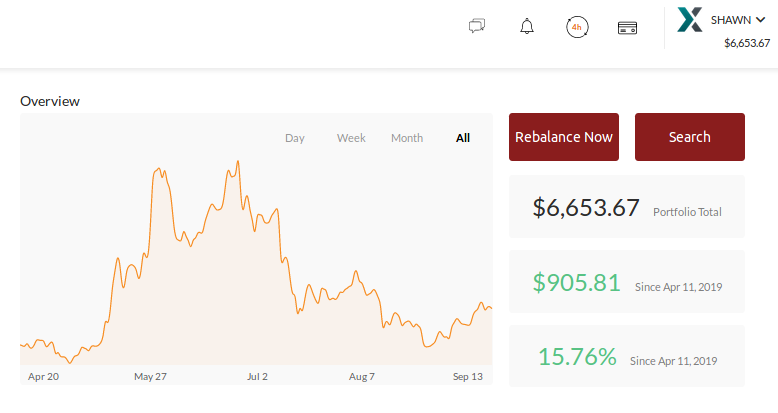

In [12]:
from IPython.display import Image
Image('./polo_portfolio.png')